# Case iFood


[Repositório com dados](https://github.com/Victor-cb/case_ifood_aulas.git)

## Objetivos


* Colocar em prática os conhecimentos adquiridos até aqui

* Permitir que cada um avalie sua própria performance detalhadamente

* Introduzir a experiência de case interview em Data Science, método comum em processos seletivos (material baseado em um processo seletivo real)


## Dinâmica

* O case será realizado em duas fases: 
  * (I) entendimento do problema e planejamento;
* (II) Execução 
  * Fase I - Entendimento do Problema e Planejamento (Máximo de 25 min)
  *  Baixar os arquivos na pasta da aula ou repositório
     *  pdf: contém a descrição (em inglês) do case, seus objetivos e informações sobre os dados
     *  csv: base de dados de referência para a realização do case

* Construir um roteiro de análise (planejamento) para solução do problema, individualmente. O roteiro deve ser no formato de 
* Tarefa: Descrição da tarefa
* Sub-tarefa1: Descrição/Justificativa
* Sub-tarefa2: Descrição/Justificativa
* Fase II - Execução (1h:40min)
* Cada aluno terá até 1h:40min para desenvolver a solução do case individualmente
* Ao final do tempo (aprox. às 21h:15min), deverá  anexar sua solução no drive




### Dicas

- Fase I
- Garanta que entendeu o problema, faça uma definição simples e objetiva
- Procure organizar as atividades que irá realizar.

- Fase II
- Comece entendendo o dataset: do que se tratam os dados? Qual a unidade de análise?
- Entenda melhor as features disponíveis
- Verifique se as informações são consistentes
- Que tipo de informação podemos derivar dos dados disponíveis?
- Quais tratamentos podemos realizar?
- Como comunicar nossos achados (storytelling)?


In [89]:
import pandas as pd
pd.options.display.max_columns=500
# Carregar os dados
people = pd.read_csv('ifood_people.csv')
campaigns = pd.read_csv('ifood_previous_campaing.csv')
purchase_profile = pd.read_csv('ifood_purchase_profile.csv')

# Atualizar os nomes das colunas em campaigns para português
campaigns.columns = ['ID', 'AceitouCmp3', 'AceitouCmp4', 'AceitouCmp5', 'AceitouCmp1', 'AceitouCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

# Mesclar os dados
data = people.merge(campaigns, on='ID').merge(purchase_profile, on='ID')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   AceitouCmp3          2240 non-null   int64  
 8   AceitouCmp4          2240 non-null   int64  
 9   AceitouCmp5          2240 non-null   int64  
 10  AceitouCmp1          2240 non-null   int64  
 11  AceitouCmp2          2240 non-null   int64  
 12  Complain             2240 non-null   int64  
 13  Z_CostContact        2240 non-null   int64  
 14  Z_Revenue            2240 non-null   int64  
 15  Response             2240 non-null   i

In [91]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,AceitouCmp3,AceitouCmp4,AceitouCmp5,AceitouCmp1,AceitouCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,0,0,0,0,0,0,3,11,1,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,0,0,0,0,0,0,3,11,0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,0,0,0,0,0,0,3,11,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,0,0,0,0,0,0,3,11,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,0,0,0,0,0,0,3,11,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np


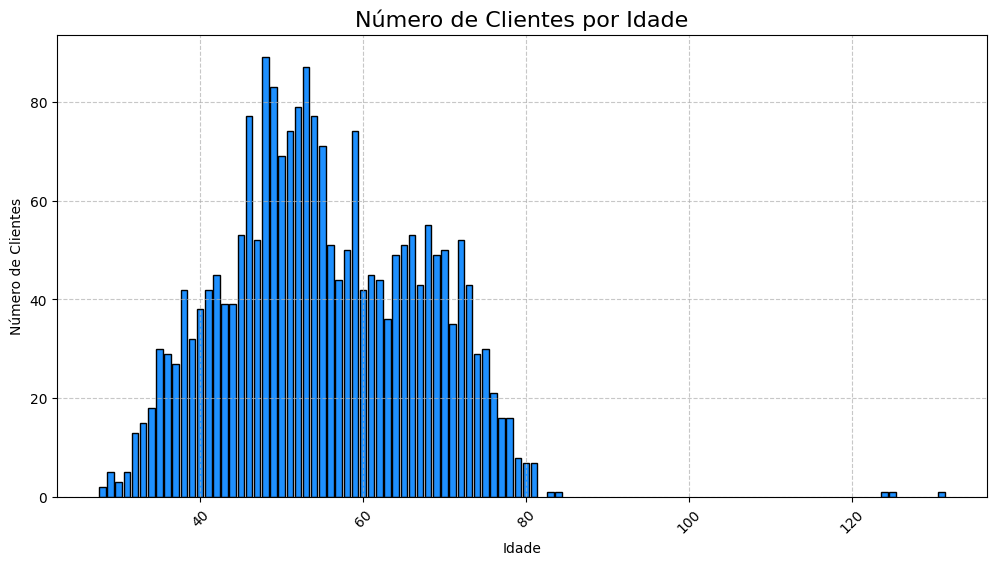

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Supondo que o DataFrame 'data' já esteja carregado
# Calcular a idade diretamente
data_atual = datetime.date.today()
ano_atual = data_atual.year

# Adicionar uma coluna 'Age' ao DataFrame com a idade dos clientes
data['Age'] = ano_atual - data['Year_Birth']

# Contar o número de clientes em cada faixa etária
qtd_idades = data['Age'].value_counts().sort_index(ascending=True)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(qtd_idades.index, qtd_idades.values, color='dodgerblue', edgecolor='black')
plt.title('Número de Clientes por Idade', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


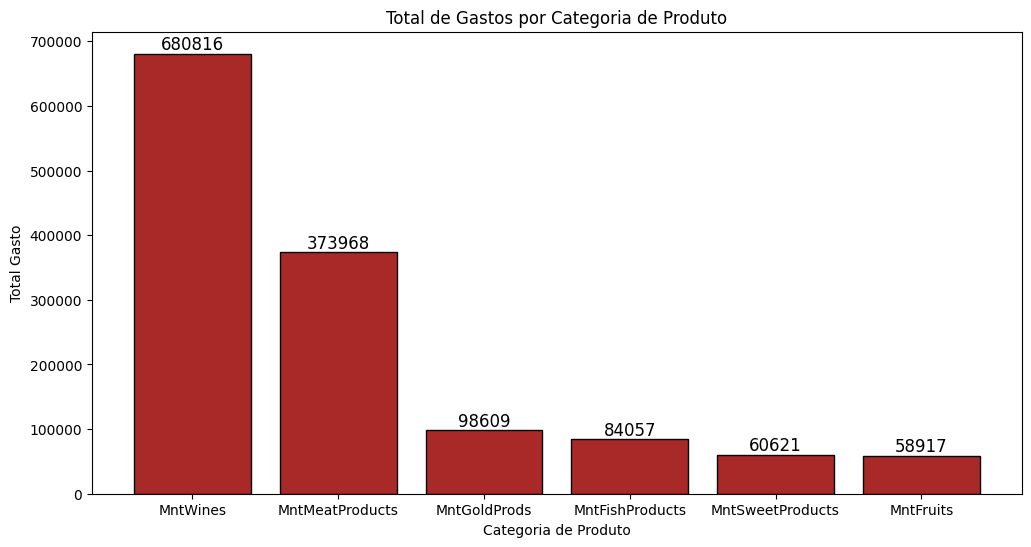

In [111]:
# Gastos por categoria de produto
categorias = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

categoria_total = data[categorias].sum()
categoria_total = categoria_total.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
bars = plt.bar(categoria_total.index, categoria_total.values, color='#a92929', edgecolor='black')
# Adicionar rótulos com porcentagem
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.2,  # Pequeno ajuste para que o texto não fique colado à barra
        height, 
        ha='center', 
        va='bottom',
        fontsize=12,
        color='black'
    )

plt.title('Total de Gastos por Categoria de Produto')
plt.xlabel('Categoria de Produto')
plt.ylabel('Total Gasto')
plt.show()

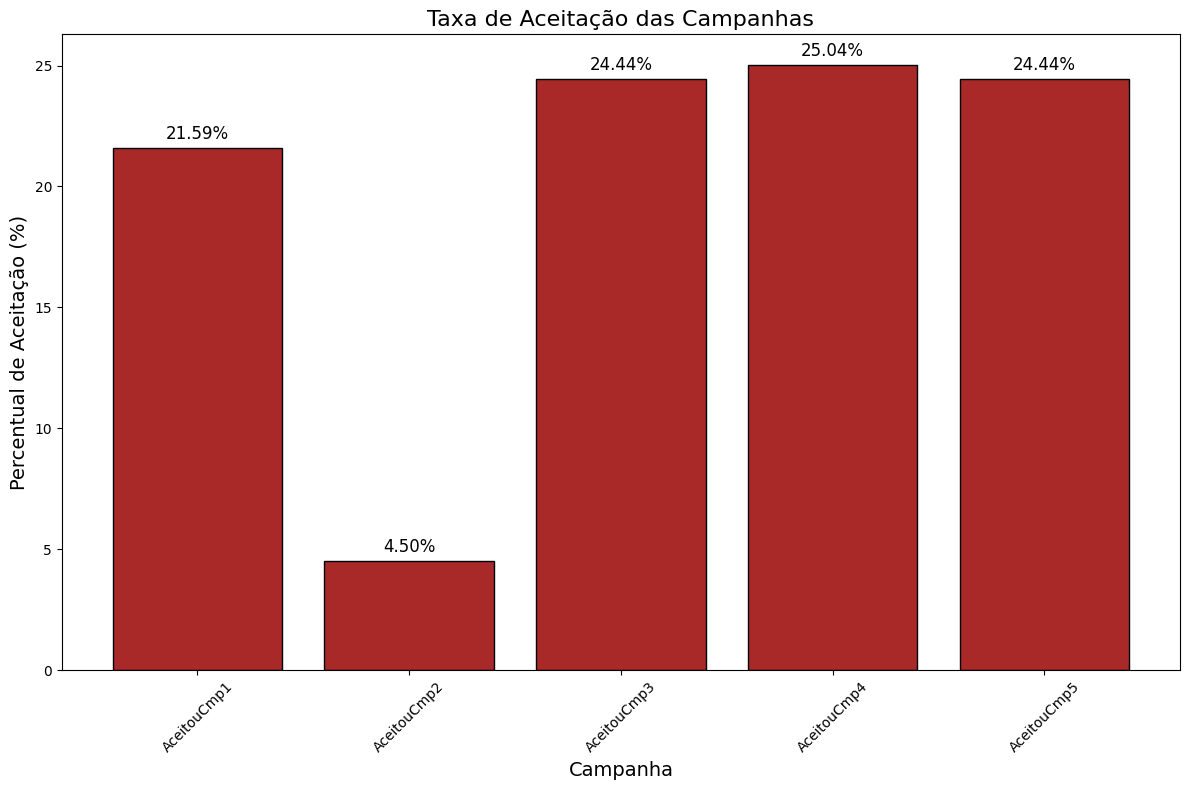

In [87]:
# Definir as colunas das campanhas
colunas_campanhas = ['AceitouCmp1', 'AceitouCmp2', 'AceitouCmp3', 'AceitouCmp4', 'AceitouCmp5']

# Calcular a taxa média de aceitação das campanhas
taxa_de_aceitacao = data[colunas_campanhas].mean()

# Normalizar para que a soma total seja 100%
total_rate = taxa_de_aceitacao.sum()
porcentagens_aceitacao = (taxa_de_aceitacao / total_rate) * 100

# Arredondar para 2 casas decimais
porcentagens_aceitacao = porcentagens_aceitacao.round(2)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))

# Plotar as barras
bars = plt.bar(porcentagens_aceitacao.index, porcentagens_aceitacao.values, color='#a92929', edgecolor='black')

# Adicionar rótulos com porcentagem
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.2,  # Pequeno ajuste para que o texto não fique colado à barra
        f'{height:.2f}%', 
        ha='center', 
        va='bottom',
        fontsize=12,
        color='black'
    )

plt.title('Taxa de Aceitação das Campanhas', fontsize=16)
plt.xlabel('Campanha', fontsize=14)
plt.ylabel('Percentual de Aceitação (%)', fontsize=14)
plt.xticks(rotation=45)  # Adicionar rotação aos rótulos do eixo x se necessário
plt.tight_layout()  # Ajustar o layout para não cortar rótulos
plt.show()